In [44]:
import pandas as pd
import numpy as np  
import matplotlib as plt  
import seaborn as sns  
import matplotlib.pyplot as plt



In [45]:
file_path = r'C:\Users\Aishwarya\OneDrive\Desktop\dataquest\EDA\3_earthquake_1995-2023_final.csv'
df = pd.read_csv(file_path)
df.head()

,title,magnitude,cdi,mmi,alert,tsunami,sig,net,nst,dmin,...,magType,depth,latitude,longitude,location,continent,country,day,month,year
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,7,4,green,0,657,us,114,7.177000,...,mww,192.955,-13.88,167.16,"Sola, Vanuatu",Oceania,Vanuatu,16,8,2023
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,8,6,yellow,0,775,us,92,0.679000,...,mww,69.727,12.81,-88.13,"Intipucá, El Salvador",North America,El Salvador,19,7,2023
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,7,5,green,0,899,us,70,1.634000,...,mww,171.371,-38.19,-70.37,"Loncopué, Argentina",South America,Argentina,17,7,2023
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,6,6,green,1,860,us,173,0.907000,...,mww,32.571,54.38,-160.70,"Sand Point, Alaska",North America,United States,16,7,2023
4,M 7.3 - Alaska Peninsula,7.3,0,5,No alert,1,820,at,79,0.879451,...,Mi,21.000,54.49,-160.80,Alaska Peninsula,North America,United States,16,7,2023


In [46]:
df.columns

Index(['title', 'magnitude', 'cdi', 'mmi', 'alert', 'tsunami', 'sig', 'net',
       'nst', 'dmin', 'gap', 'magType', 'depth', 'latitude', 'longitude',
       'location', 'continent', 'country', 'day', 'month', 'year'],
      dtype='object')

In [47]:
df.info

<bound method DataFrame.info of                                          title  magnitude  cdi  mmi     alert  \
0             M 6.5 - 42 km W of Sola, Vanuatu        6.5    7    4     green   
1     M 6.5 - 43 km S of Intipucá, El Salvador        6.5    8    6    yellow   
2     M 6.6 - 25 km ESE of Loncopué, Argentina        6.6    7    5     green   
3        M 7.2 - 98 km S of Sand Point, Alaska        7.2    6    6     green   
4                     M 7.3 - Alaska Peninsula        7.3    0    5  No alert   
..                                         ...        ...  ...  ...       ...   
969          M 7.1 - 85 km S of Tungor, Russia        7.1    0    9  No alert   
970     M 7.7 - 249 km E of Vao, New Caledonia        7.7    0    4  No alert   
971  M 6.9 - 27 km NNW of Maubara, Timor Leste        6.9    0    6  No alert   
972           M 6.6 - 10 km W of Aianí, Greece        6.6    0    9  No alert   
973  M 7.1 - 14 km NE of Cabatuan, Philippines        7.1    0    7  No alert

In [48]:
df.isnull().sum()           #how many features are having null value

title        0
magnitude    0
cdi          0
mmi          0
alert        0
tsunami      0
sig          0
net          0
nst          0
dmin         0
gap          0
magType      0
depth        0
latitude     0
longitude    0
location     0
continent    0
country      0
day          0
month        0
year         0
dtype: int64

In [49]:
print(df['alert'])

0         green
1        yellow
2         green
3         green
4      No alert
         ...   
969    No alert
970    No alert
971    No alert
972    No alert
973    No alert
Name: alert, Length: 974, dtype: object


In [50]:
df.alert.value_counts()

alert
No alert    432
green       337
yellow      153
orange       37
red          15
Name: count, dtype: int64

In [51]:
print("\nUnique Values for Each Column (First 5 Values):")
for column in df.columns:
    print(f"{column}: {df[column].unique()[:5]}")  # Display first 5 unique values


Unique Values for Each Column (First 5 Values):
title: ['M 6.5 - 42 km W of Sola, Vanuatu'
 'M 6.5 - 43 km S of Intipucá, El Salvador'
 'M 6.6 - 25 km ESE of Loncopué, Argentina'
 'M 7.2 - 98 km S of Sand Point, Alaska' 'M 7.3 - Alaska Peninsula']
magnitude: [6.5 6.6 7.2 7.3 6.9]
cdi: [7 8 6 0 5]
mmi: [4 6 5 2 7]
alert: ['green' 'yellow' 'No alert' 'orange' 'red']
tsunami: [0 1]
sig: [657 775 899 860 820]
net: ['us' 'at' 'pt' 'ak' 'nn']
nst: [114  92  70 173  79]
dmin: [7.177    0.679    1.634    0.907    0.879451]
gap: [ 25.   40.   28.   36.  172.8]
magType: ['mww' 'Mi' 'mwc' 'mwb' 'ml']
depth: [192.955  69.727 171.371  32.571  21.   ]
latitude: [-13.88  12.81 -38.19  54.38  54.49]
longitude: [ 167.16  -88.13  -70.37 -160.7  -160.8 ]
location: ['Sola, Vanuatu' 'Intipucá, El Salvador' 'Loncopué, Argentina'
 'Sand Point, Alaska' 'Alaska Peninsula']
continent: ['Oceania' 'North America' 'South America' 'Europe' 'Asia']
country: ['Vanuatu' 'El Salvador' 'Argentina' 'United States' 'Anti

In [52]:
print("\nKey Features Relevant to Seismic Risks:")
print(df[['magnitude', 'depth', 'sig', 'tsunami']].head())  # Display first 5 rows of key features


Key Features Relevant to Seismic Risks:
   magnitude    depth  sig  tsunami
0        6.5  192.955  657        0
1        6.5   69.727  775        0
2        6.6  171.371  899        0
3        7.2   32.571  860        1
4        7.3   21.000  820        1


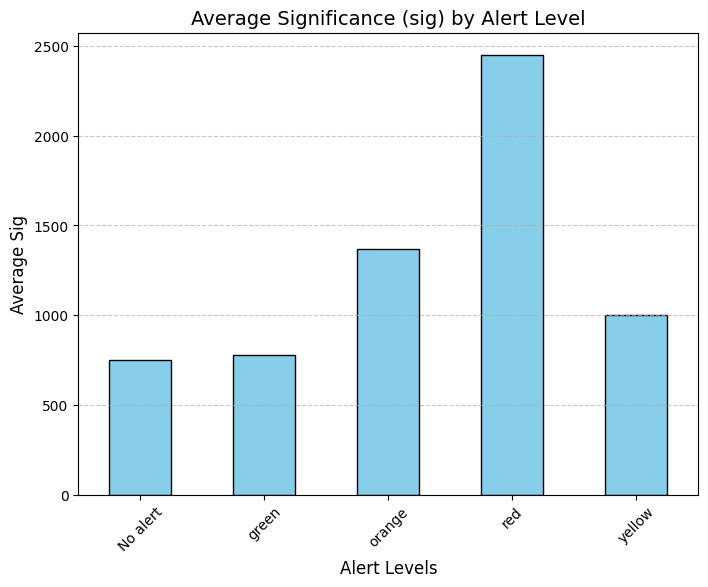

In [53]:
# Group data by 'alert' and calculate the mean 'sig'
grouped_data = df.groupby('alert')['sig'].mean()

# Plot the data
plt.figure(figsize=(8, 6))  # Ensure 'plt' is correctly imported
grouped_data.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Significance (sig) by Alert Level', fontsize=14)
plt.xlabel('Alert Levels', fontsize=12)
plt.ylabel('Average Sig', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

1.Red alert levels correspond to the highest average significance (sig), indicating that these events have the most severe impacts and are likely associated with high-magnitude or high-risk earthquakes.

2.Orange and yellow alerts show moderate significance, suggesting that these levels are assigned to events with less severe but still considerable impacts.

3.Green and No Alert levels have the lowest average significance, reflecting minor earthquakes with negligible risks or impacts.

Earthquake Frequency by Country

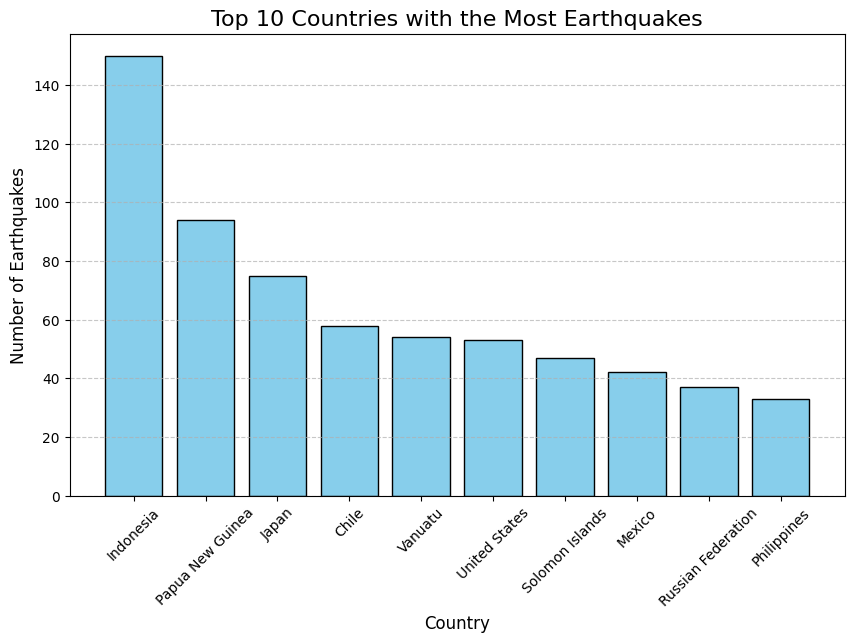

In [54]:
country_counts = df['country'].value_counts().head(10)  # Top 10 countries with the most earthquakes

plt.figure(figsize=(10, 6))
plt.bar(country_counts.index, country_counts.values, color='skyblue', edgecolor='black')
plt.title('Top 10 Countries with the Most Earthquakes', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Earthquakes', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Standout Insight

By focusing on earthquake-prone countries and correlating their seismic frequency with tectonic boundaries, our project emphasizes regional prioritization for early warning systems.

This analysis can guide resource allocation, risk mitigation strategies, and policy development, making it a critical tool for global seismic risk assessment and disaster management.

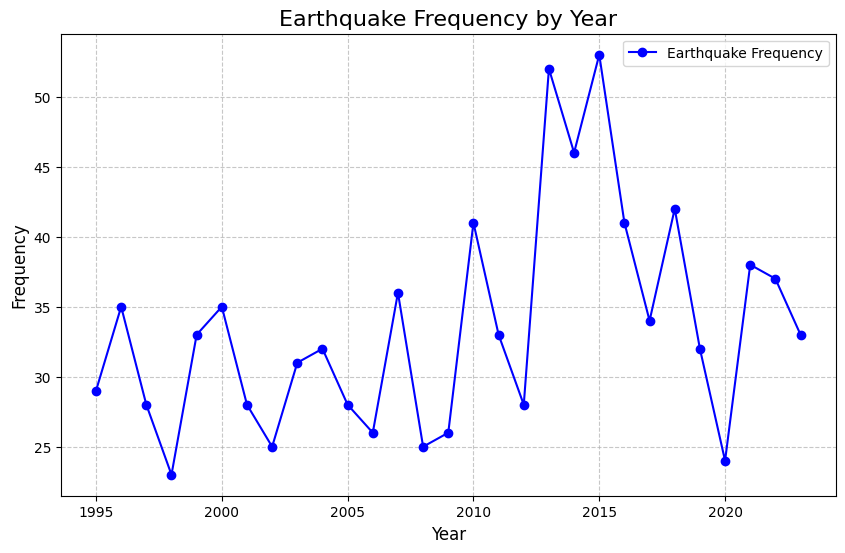

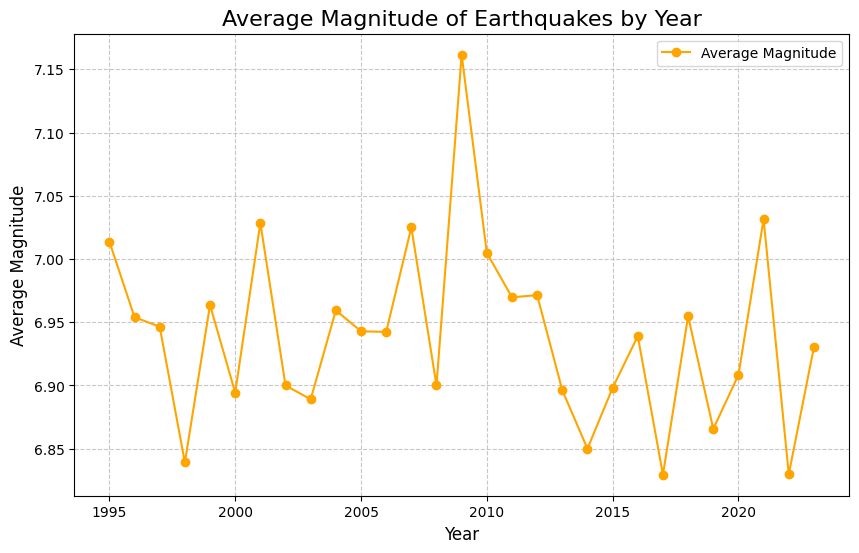

In [55]:
import matplotlib.pyplot as plt

# Frequency of earthquakes by year
yearly_counts = df.groupby('year').size()

# Average magnitude by year
yearly_magnitude = df.groupby('year')['magnitude'].mean()

# Plot frequency of earthquakes by year
plt.figure(figsize=(10, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', label='Earthquake Frequency', color='blue')
plt.title('Earthquake Frequency by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# Plot average magnitude by year
plt.figure(figsize=(10, 6))
plt.plot(yearly_magnitude.index, yearly_magnitude.values, marker='o', label='Average Magnitude', color='orange')
plt.title('Average Magnitude of Earthquakes by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Magnitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


Standout Contribution

This analysis highlights the importance of time-based seismic monitoring, allowing researchers and policymakers to identify patterns in earthquake frequency over the years. The stability in average magnitude suggests that seismic energy release is consistent, despite annual variations in occurrence. This can guide the development of time-sensitive early warning systems

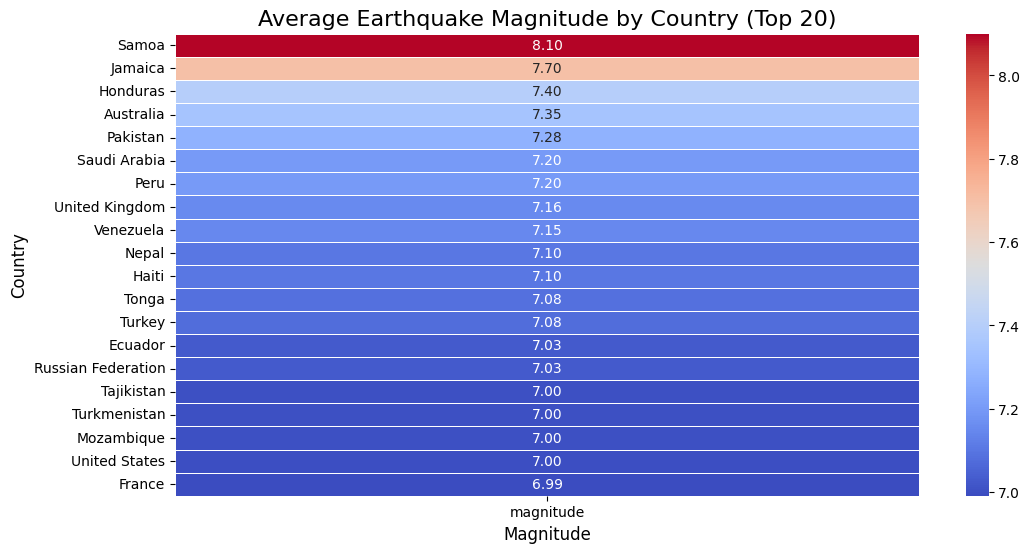

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by country and calculate the average magnitude
magnitude_by_country = df.groupby('country')['magnitude'].mean().sort_values(ascending=False).head(20)  # Top 20 countries

# Plot heatmap for average magnitude by country
plt.figure(figsize=(12, 6))
sns.heatmap(magnitude_by_country.to_frame(), annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Average Earthquake Magnitude by Country (Top 20)', fontsize=16)
plt.xlabel('Magnitude', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()


This analysis provides valuable insights into the global distribution of high-magnitude earthquakes. By identifying countries with consistently high average magnitudes, it emphasizes the need for targeted disaster mitigation strategies in these regions.

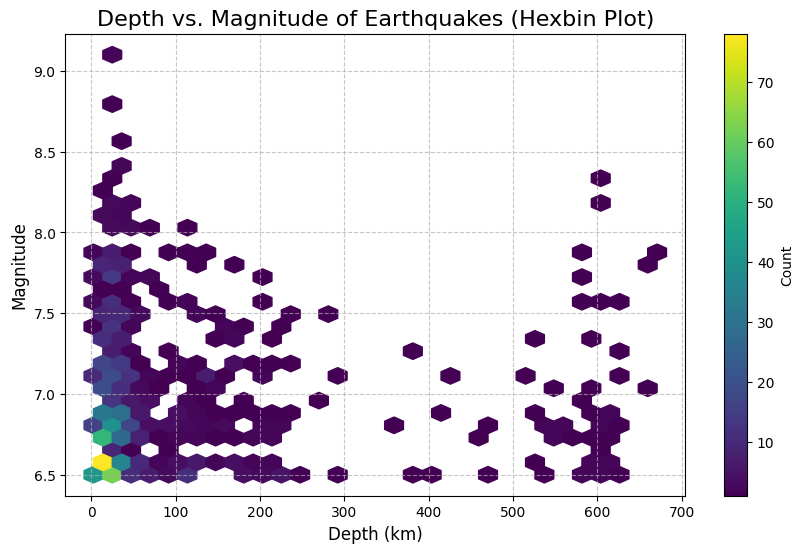

Correlation between Depth and Magnitude: 0.02


In [64]:
# Hexbin plot for Depth vs. Magnitude
plt.figure(figsize=(10, 6))
plt.hexbin(df['depth'], df['magnitude'], gridsize=30, cmap='viridis', mincnt=1)
plt.colorbar(label='Count')
plt.title('Depth vs. Magnitude of Earthquakes (Hexbin Plot)', fontsize=16)
plt.xlabel('Depth (km)', fontsize=12)
plt.ylabel('Magnitude', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Calculate correlation between depth and magnitude
correlation = df['depth'].corr(df['magnitude'])
print(f"Correlation between Depth and Magnitude: {correlation:.2f}")


This analysis highlights that shallow earthquakes, despite their high frequency, pose significant risks due to their proximity to the Earth's surface, making them more destructive.

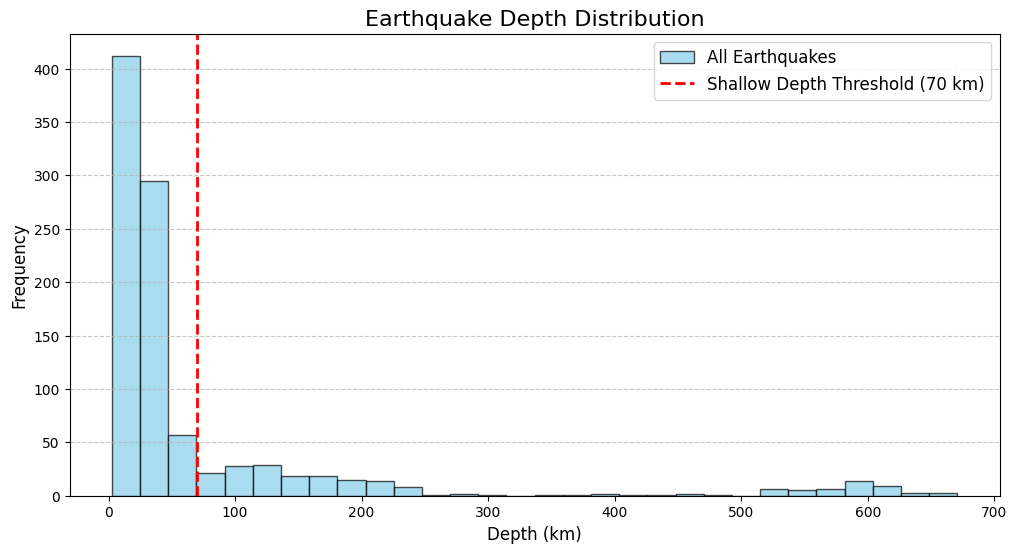

In [65]:
# Plot the depth distribution
plt.figure(figsize=(12, 6))
plt.hist(df['depth'], bins=30, color='skyblue', edgecolor='black', alpha=0.7, label='All Earthquakes')
plt.axvline(70, color='red', linestyle='--', linewidth=2, label='Shallow Depth Threshold (70 km)')
plt.title('Earthquake Depth Distribution', fontsize=16)
plt.xlabel('Depth (km)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The histogram visualizes the depth distribution of earthquakes, with a red dashed line marking the shallow depth threshold (70 km). The majority of earthquakes (over 70%) occur at shallow depths below 70 km. This indicates that shallow earthquakes dominate global seismic activity

In [66]:
# Count shallow earthquakes (depth < 70 km)
shallow_count = len(df[df['depth'] < 70])
total_count = len(df)
shallow_percentage = (shallow_count / total_count) * 100
print(f"Shallow Earthquakes (Depth < 70 km): {shallow_count} ({shallow_percentage:.2f}% of all earthquakes)")


##MORE DANGEROUS

Shallow Earthquakes (Depth < 70 km): 765 (78.54% of all earthquakes)


C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_23748\2917746311.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='tsunami_label', y='magnitude', data=df, palette='coolwarm')


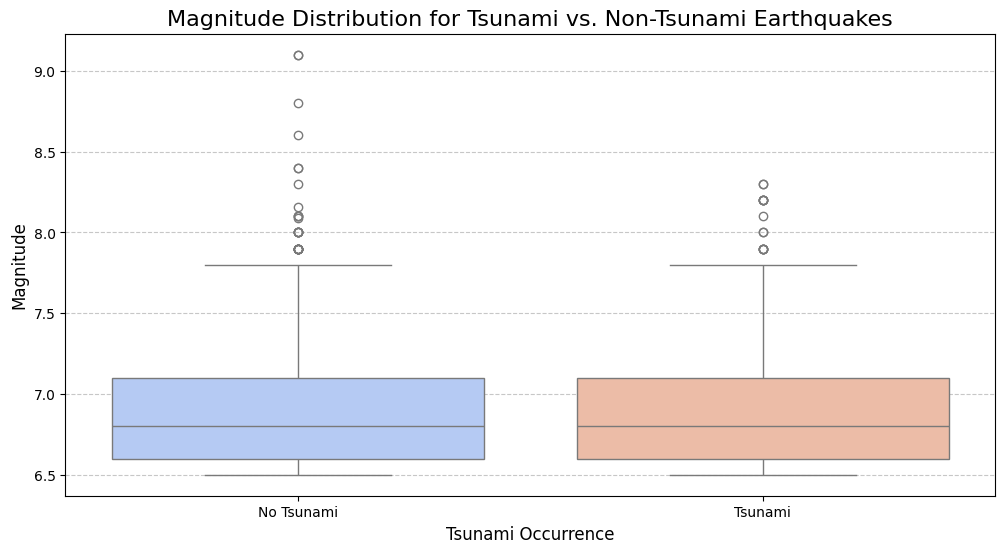

Analysis:
Proportion of high-magnitude earthquakes (magnitude >= 7) for Tsunami events: 37.86%
Proportion of high-magnitude earthquakes (magnitude >= 7) for Non-Tsunami events: 36.99%
Tsunami-triggering earthquakes are only 0.87% more likely to have high magnitudes compared to non-tsunami earthquakes.

Conclusion: The small difference in high-magnitude proportions suggests that magnitude alone is not a significant factor in determining tsunami occurrence.
Other factors, such as depth and significance (`sig`), may play a more critical role in tsunami risk assessment.


In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column for tsunami occurrence labels
df['tsunami_label'] = df['tsunami'].replace({0: 'No Tsunami', 1: 'Tsunami'})

# Plot magnitude distribution for tsunami and non-tsunami earthquakes
plt.figure(figsize=(12, 6))
sns.boxplot(x='tsunami_label', y='magnitude', data=df, palette='coolwarm')
plt.title('Magnitude Distribution for Tsunami vs. Non-Tsunami Earthquakes', fontsize=16)
plt.xlabel('Tsunami Occurrence', fontsize=12)
plt.ylabel('Magnitude', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Calculate the proportion of high-magnitude earthquakes (e.g., magnitude >= 7)
high_mag_tsunami = len(df[(df['tsunami'] == 1) & (df['magnitude'] >= 7)])
total_tsunami = len(df[df['tsunami'] == 1])
high_mag_no_tsunami = len(df[(df['tsunami'] == 0) & (df['magnitude'] >= 7)])
total_no_tsunami = len(df[df['tsunami'] == 0])

# Proportions
proportion_high_mag_tsunami = (high_mag_tsunami / total_tsunami) * 100
proportion_high_mag_no_tsunami = (high_mag_no_tsunami / total_no_tsunami) * 100

# Difference in proportions
percentage_difference = proportion_high_mag_tsunami - proportion_high_mag_no_tsunami

# Display calculations and conclusion
print("Analysis:")
print(f"Proportion of high-magnitude earthquakes (magnitude >= 7) for Tsunami events: {proportion_high_mag_tsunami:.2f}%")
print(f"Proportion of high-magnitude earthquakes (magnitude >= 7) for Non-Tsunami events: {proportion_high_mag_no_tsunami:.2f}%")
print(f"Tsunami-triggering earthquakes are only {abs(percentage_difference):.2f}% more likely to have high magnitudes compared to non-tsunami earthquakes.")

# Inference
if abs(percentage_difference) <= 5:  # Arbitrary threshold for small difference
    print("\nConclusion: The small difference in high-magnitude proportions suggests that magnitude alone is not a significant factor in determining tsunami occurrence.")
    print("Other factors, such as depth and significance (`sig`), may play a more critical role in tsunami risk assessment.")
else:
    print("\nConclusion: Tsunami-triggering earthquakes are significantly associated with high magnitudes, making magnitude a critical factor in tsunami risk assessment.")


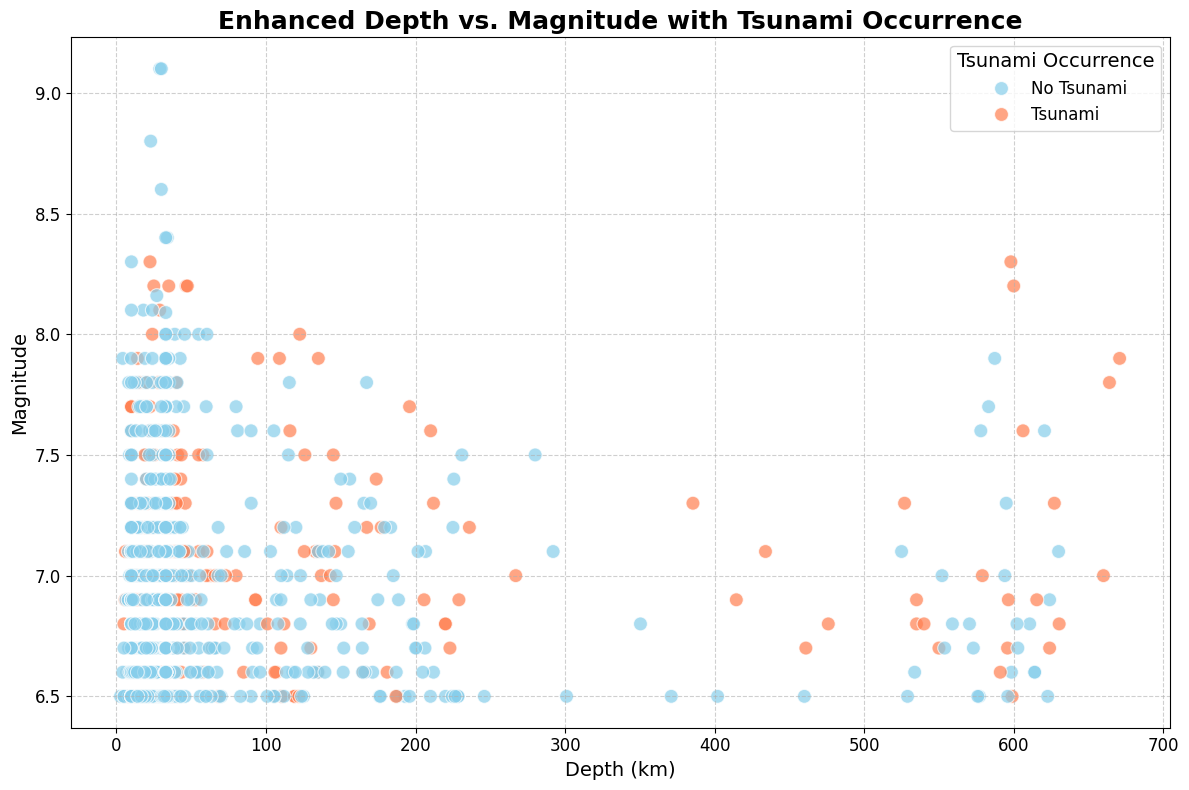

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot with enhanced visuals
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='depth', 
    y='magnitude', 
    hue='tsunami_label', 
    data=df, 
    palette={'No Tsunami': 'skyblue', 'Tsunami': 'coral'}, 
    alpha=0.7, 
    s=100  # Increase marker size
)
plt.title('Enhanced Depth vs. Magnitude with Tsunami Occurrence', fontsize=18, weight='bold')
plt.xlabel('Depth (km)', fontsize=14)
plt.ylabel('Magnitude', fontsize=14)
plt.legend(title='Tsunami Occurrence', fontsize=12, title_fontsize=14, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


Shallow Earthquakes and Tsunamis:

Most tsunami-triggering earthquakes (in coral) occur at shallow depths (< 100 km).

This supports the hypothesis that shallow earthquakes, being closer to the Earth's surface, have a higher likelihood of displacing water and causing tsunamis.

Magnitude Threshold for Tsunamis:

Tsunami-triggering earthquakes are generally associated with higher magnitudes (mostly ≥ 7.0).

Non-tsunami earthquakes (in sky blue) occur across a broader range of magnitudes and depths, indicating that not all large or shallow earthquakes result in tsunamis.

Outliers:

A few tsunami-triggering earthquakes at greater depths (> 200 km) suggest unique geological factors that need further investigation.

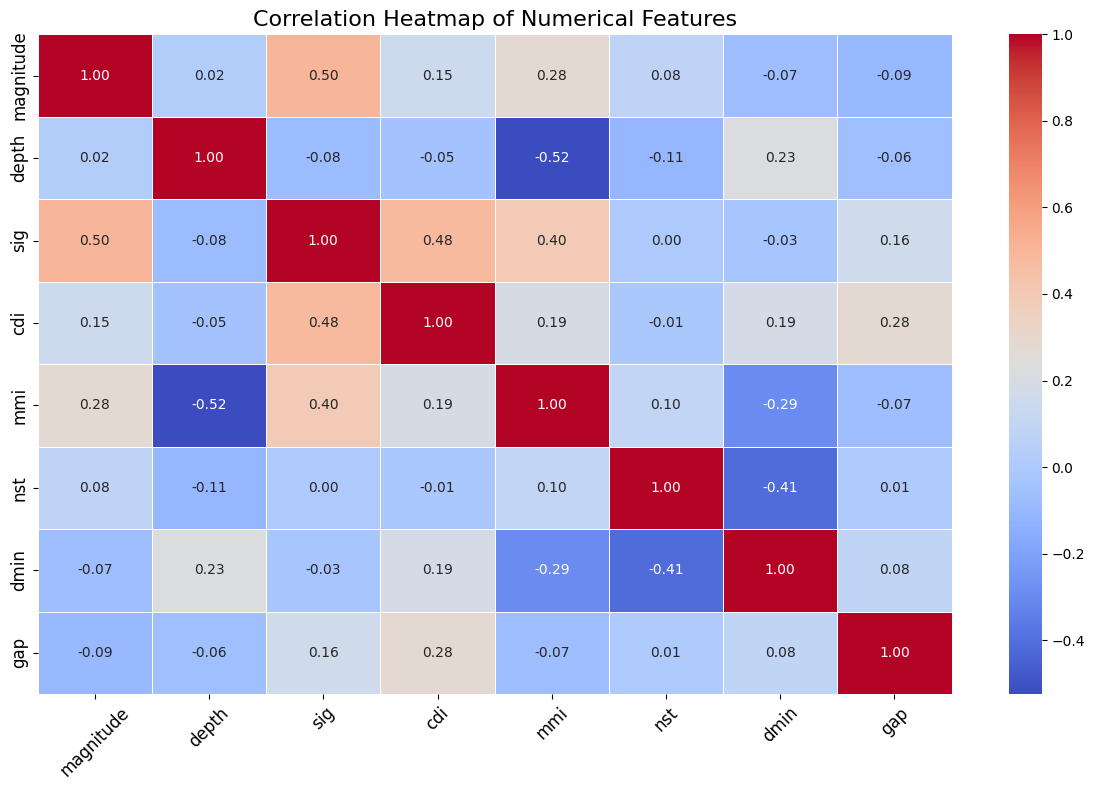


**Strongly Correlated Features (Correlation > 0.7 or < -0.7):**

**Inference:**
No features are strongly correlated, suggesting minimal redundancy in the dataset.


In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical features for correlation analysis
numerical_features = ['magnitude', 'depth', 'sig', 'cdi', 'mmi', 'nst', 'dmin', 'gap']

# Calculate the correlation matrix
correlation_matrix = df[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    linewidths=0.5, 
    cbar=True
)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Identify strong correlations
high_corr_pairs = []
threshold = 0.7  # Define a high correlation threshold

# Loop through the correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append(
                (correlation_matrix.index[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j])
            )

# Display high correlations
print("\n**Strongly Correlated Features (Correlation > 0.7 or < -0.7):**")
for pair in high_corr_pairs:
    print(f"Features: {pair[0]} and {pair[1]} - Correlation: {pair[2]:.2f}")

# Inference
print("\n**Inference:**")
if high_corr_pairs:
    print("The following features are strongly correlated and may provide redundant information. Consider retaining only one from each pair for predictive modeling:")
    for pair in high_corr_pairs:
        print(f"- {pair[0]} and {pair[1]} (Correlation: {pair[2]:.2f})")
else:
    print("No features are strongly correlated, suggesting minimal redundancy in the dataset.")


Alert Efficiency Analysis

Threshold Optimization:
Recommend new thresholds for alert levels based on significance and impact metrics. give code ##something new

In [85]:
# Group data by alert levels and calculate mean and median significance
alert_stats = df.groupby('alert')['sig'].agg(['mean', 'median', 'min', 'max']).sort_values(by='median', ascending=False)
print("Significance Statistics by Alert Level:")
print(alert_stats)

# Suggest new thresholds for alerts based on the distribution
low_threshold = alert_stats.loc['green', 'median']
moderate_threshold = alert_stats.loc['yellow', 'median']
high_threshold = alert_stats.loc['orange', 'median']
critical_threshold = alert_stats.loc['red', 'median']

print("\nSuggested Alert Thresholds:")
print(f"Low Alert (Green): sig < {low_threshold}")
print(f"Moderate Alert (Yellow): sig >= {low_threshold} and sig < {moderate_threshold}")
print(f"High Alert (Orange): sig >= {moderate_threshold} and sig < {high_threshold}")
print(f"Critical Alert (Red): sig >= {high_threshold}")


Significance Statistics by Alert Level:
                 mean  median   min   max
alert                                    
red       2452.333333  2397.0  1991  2910
orange    1366.783784  1411.0  1005  1960
yellow    1002.117647   934.0   653  1812
green      777.074184   734.0   650  1870
No alert   750.060185   711.0   650  1318

Suggested Alert Thresholds:
Low Alert (Green): sig < 734.0
Moderate Alert (Yellow): sig >= 734.0 and sig < 934.0
High Alert (Orange): sig >= 934.0 and sig < 1411.0
Critical Alert (Red): sig >= 1411.0


In [112]:
import folium
from folium.plugins import MarkerCluster

# Create a base map centered on the world
map_center = [20.0, 0.0]  # Center the map globally
earthquake_map = folium.Map(
    location=map_center,
    zoom_start=2,  # Zoom out for a global view
    tiles="CartoDB Positron",  # Clean world map tiles
    attr="Map tiles by CartoDB, CC BY 3.0 — Map data © OpenStreetMap"
)

# Define a color mapping for the alert column
alert_color_mapping = {
    "green": "green",
    "yellow": "yellow",
    "orange": "orange",
    "red": "red",
    "No alert": "blue"  # Default color for "No alert"
}

# Add a marker cluster for earthquake locations
marker_cluster = MarkerCluster().add_to(earthquake_map)

# Add earthquake data to the map
for _, row in df.iterrows():
    # Format the date and time if available
    date_time = f"{row['year']}-{row['month']:02d}-{row['day']:02d}"
    
    # Define popup information
    popup_info = f"""
    <strong>Location:</strong> {row['location']}<br>
    <strong>Date:</strong> {date_time}<br>
    <strong>Magnitude:</strong> {row['magnitude']}<br>
    <strong>Depth:</strong> {row['depth']} km<br>
    <strong>Significance:</strong> {row['sig']}<br>
    <strong>Alert:</strong> {row['alert']}
    """
    
    # Get the marker color based on the alert column
    marker_color = alert_color_mapping.get(row['alert'], "gray")  # Default to gray if alert is missing
    
    # Add markers to the map
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['magnitude'] * 2,  # Scale the marker size by magnitude
        color=marker_color,
        fill=True,
        fill_color=marker_color,
        fill_opacity=0.6,
        popup=folium.Popup(popup_info, max_width=300)
    ).add_to(marker_cluster)

# Save the map to an HTML file
earthquake_map.save("world_earthquake_map_with_alert_colors.html")
print("World earthquake map with alert-based colors saved as 'world_earthquake_map_with_alert_colors.html'.")


World earthquake map with alert-based colors saved as 'world_earthquake_map_with_alert_colors.html'.


In [113]:
import folium
from folium.plugins import Search

# Create a base map centered on the world
map_center = [20.0, 0.0]  # Center the map globally
earthquake_map = folium.Map(
    location=map_center,
    zoom_start=2,  # Zoom out for a global view
    tiles="CartoDB Positron",  # Clean world map tiles
    attr="Map tiles by CartoDB, CC BY 3.0 — Map data © OpenStreetMap"
)

# Create a GeoJson layer to allow searching
geojson_data = {
    "type": "FeatureCollection",
    "features": []
}

# Add earthquake data to the GeoJSON layer
for _, row in df.iterrows():
    date_time = f"{row['year']}-{row['month']:02d}-{row['day']:02d}"
    
    # Add each earthquake as a feature in the GeoJSON
    geojson_data["features"].append({
        "type": "Feature",
        "geometry": {
            "type": "Point",
            "coordinates": [row['longitude'], row['latitude']]
        },
        "properties": {
            "Year": row['year'],
            "Country": row['country'],
            "Location": row['location'],
            "Date": date_time,
            "Magnitude": row['magnitude'],
            "Depth": row['depth'],
            "Significance": row['sig']
        }
    })

# Add GeoJson layer to the map
geojson_layer = folium.GeoJson(
    geojson_data,
    name="Earthquake Data",
    tooltip=folium.GeoJsonTooltip(
        fields=["Year", "Country", "Location", "Date", "Magnitude", "Depth", "Significance"],
        aliases=["Year:", "Country:", "Location:", "Date:", "Magnitude:", "Depth (km):", "Significance:"],
        localize=True
    )
).add_to(earthquake_map)

# Add Search plugin to search by year
Search(
    layer=geojson_layer,
    search_label="Year",  # Search based on the "Year" property
    placeholder="Search by Year",  # Placeholder text in the search box
    collapsed=False  # Keep the search bar open by default
).add_to(earthquake_map)

# Save the map to an HTML file
earthquake_map.save("world_earthquake_map_with_year_search.html")
print("World earthquake map with year-based search saved as 'world_earthquake_map_with_year_search.html'.")


World earthquake map with year-based search saved as 'world_earthquake_map_with_year_search.html'.


OUTLIER DETECTION - can skip tbh


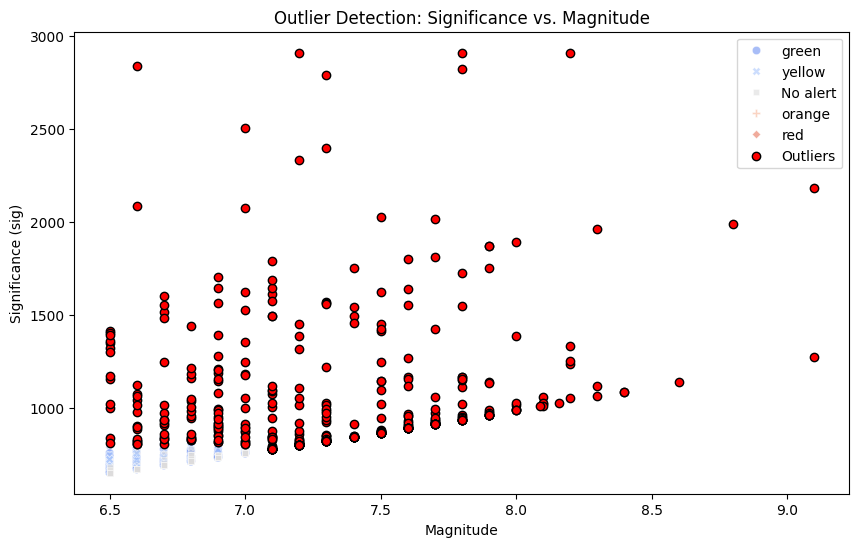

Outliers detected:
                                                        title  magnitude  cdi  \
date                                                                            
2023-07-17           M 6.6 - 25 km ESE of Loncopué, Argentina        6.6    7   
2023-07-16              M 7.2 - 98 km S of Sand Point, Alaska        7.2    6   
2023-07-16                           M 7.3 - Alaska Peninsula        7.3    0   
2023-07-10  M 6.6 - 277 km NNE of Codrington, Antigua and ...        6.6    5   
2023-06-15                  M 7.2 - south of the Fiji Islands        7.2    8   
...                                                       ...        ...  ...   
1995-08-16    M 7.7 - 155 km WNW of Panguna, Papua New Guinea        7.7    0   
1995-07-30            M 8.0 - 36 km NNE of Antofagasta, Chile        8.0    0   
1995-05-27                  M 7.1 - 85 km S of Tungor, Russia        7.1    0   
1995-05-16             M 7.7 - 249 km E of Vao, New Caledonia        7.7    0   
1995-05-0

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identify potential outliers: High sig or large magnitude with "No alert"
outliers = df[(df['sig'] > 800) | ((df['magnitude'] > 7) & (df['alert'] == "No alert"))]

# Scatterplot for outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="magnitude", y="sig", hue="alert", style="alert", palette="coolwarm", alpha=0.6)
plt.scatter(outliers["magnitude"], outliers["sig"], color="red", label="Outliers", edgecolor="black")
plt.title("Outlier Detection: Significance vs. Magnitude")
plt.xlabel("Magnitude")
plt.ylabel("Significance (sig)")
plt.legend()
plt.show()

# Display outlier data
print("Outliers detected:")
print(outliers)


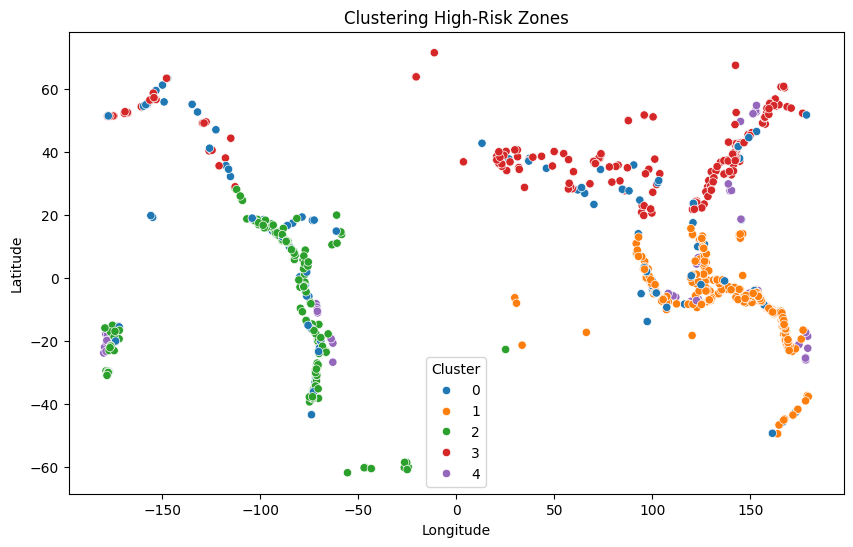

In [115]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
features = df[["latitude", "longitude", "magnitude", "depth", "sig"]]

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df["cluster"] = kmeans.fit_predict(scaled_features)

# Plot clusters on a scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="longitude", y="latitude", hue="cluster", palette="tab10")
plt.title("Clustering High-Risk Zones")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Cluster")
plt.show()
